In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure
import plotly.express as px

In [2]:
sales_df = pd.read_csv('sales.csv')
sales_df.head()

,Opportunity: Account,Opportunity Name,JobID,Stage,Close Date,Commissionable Margin Currency,Commissionable Margin,Total Internal Services Margin Currency,Total Internal Services Margin,Cloud Services Team Margin Currency,Cloud Services Team Margin,Cloud Product Team Margin Currency,Cloud Product Team Margin,Opportunity Owner,Close Month
0,CUNA Mutual,CUNA - Loan Application T&M Services,AHD201864827,PAID,1/9/2019,USD,32160.00,USD,32160.00,USD,32160.0,USD,0.0,Adam Erickson,1/1/2019
1,CUNA Mutual,CUNA - AEA DWaaS Modernization,AHD201967552,PAID,3/28/2019,USD,327772.00,USD,327772.00,USD,327772.0,USD,0.0,Adam Erickson,3/1/2019
2,CUNA Mutual,CUNA Mutual - PCR-AHD201864561-B-3,AHD201967829,Closed No Decision,3/27/2019,USD,-14043.11,USD,-14043.11,USD,NaN,USD,NaN,Adam Erickson,3/1/2019
3,CUNA Mutual,CUNA Mutual - PCR-AHD201864827-B-2,AHD201969713,PAID,6/5/2019,USD,-415.00,USD,-415.00,USD,-415.0,USD,0.0,Adam Erickson,6/1/2019
4,CUNA Mutual,CUNA Mutual - PCR-AHD201967552-B-1,AHD201971983,Deal Booked,9/10/2019,USD,35359.00,USD,35359.00,USD,35359.0,USD,0.0,Adam Erickson,9/1/2019


In [3]:
new_columns = ['account',
               'opportunity',
               'job_id',
               'stage',
               'closedate',
               'comm_currency',
               'comm_margin',
               'int_currency',
               'int_margin',
               'team_currency',
               'team_margin',
               'product_currency',
               'product_margin',
               'sales_rep',
               'close_month']

sales_df.columns = new_columns
print(sales_df.columns)
print(sales_df.info())

Index(['account', 'opportunity', 'job_id', 'stage', 'closedate',
       'comm_currency', 'comm_margin', 'int_currency', 'int_margin',
       'team_currency', 'team_margin', 'product_currency', 'product_margin',
       'sales_rep', 'close_month'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 15 columns):
account             258 non-null object
opportunity         258 non-null object
job_id              258 non-null object
stage               258 non-null object
closedate           258 non-null object
comm_currency       258 non-null object
comm_margin         258 non-null float64
int_currency        258 non-null object
int_margin          258 non-null float64
team_currency       258 non-null object
team_margin         236 non-null float64
product_currency    258 non-null object
product_margin      236 non-null float64
sales_rep           258 non-null object
close_month         258 non-null object
dtypes: float64(4), ob

In [4]:
clean_df = sales_df.copy()
clean_df['closedate'] = clean_df['closedate'].apply(lambda x: dt.datetime.strptime(x,'%m/%d/%Y'))

In [5]:
grouped_rep = clean_df.groupby('sales_rep',as_index=False).agg(np.sum)
grouped_rep = grouped_rep.sort_values(by='comm_margin',ascending=False)
grouped_rep.head(10)

,sales_rep,comm_margin,int_margin,team_margin,product_margin
8,David Burland,2334712.20,2573522.60,1837378.66,83040.67
0,Adam Erickson,1219354.82,1234305.94,1393037.55,0.00
10,Jason Edwards,1108258.63,1314810.93,1025893.63,34400.00
22,Matthew Murray,1103383.73,1001383.73,975362.00,50000.00
14,Josh Howard,1045632.64,1047028.51,681693.70,50000.00
16,Josh Weisfuse,713934.50,738099.50,471213.50,0.00
26,Richard Merchant,500000.00,500000.00,500000.00,0.00
9,Dennis Callaghan,430042.75,393475.00,99143.00,0.00
24,Noah Silvers,413272.19,431060.12,233670.30,22977.27
6,Clayton Brath,152699.21,90070.00,61540.00,62629.21


In [6]:
grouped_acct = clean_df.groupby('account',as_index=False).agg(np.sum)
grouped_acct = grouped_acct.sort_values(by='comm_margin',ascending=False)
grouped_acct.head(10)

,account,comm_margin,int_margin,team_margin,product_margin
23,CUNA Mutual,999162.89,986116.89,1000160.00,0.00
9,American Medical Association (AMA),800919.30,780644.30,669389.30,43400.00
20,"CDK Global, Inc.",767832.63,767832.63,502715.33,0.00
45,Jones Lang LaSalle Corporated,681784.73,681784.73,659313.00,0.00
54,Northwestern Memorial HealthCare,582980.25,767812.45,568609.01,24640.67
56,OneStream,500000.00,500000.00,500000.00,0.00
27,Consumers Energy Company,442600.04,394611.04,253222.00,0.00
5,AlixPartners LLP,430042.75,393475.00,99143.00,0.00
59,Relativity ODA LLC,344734.22,427399.50,5000.00,10000.00
47,Mayer Brown LLP,336291.00,336291.00,112343.00,0.00


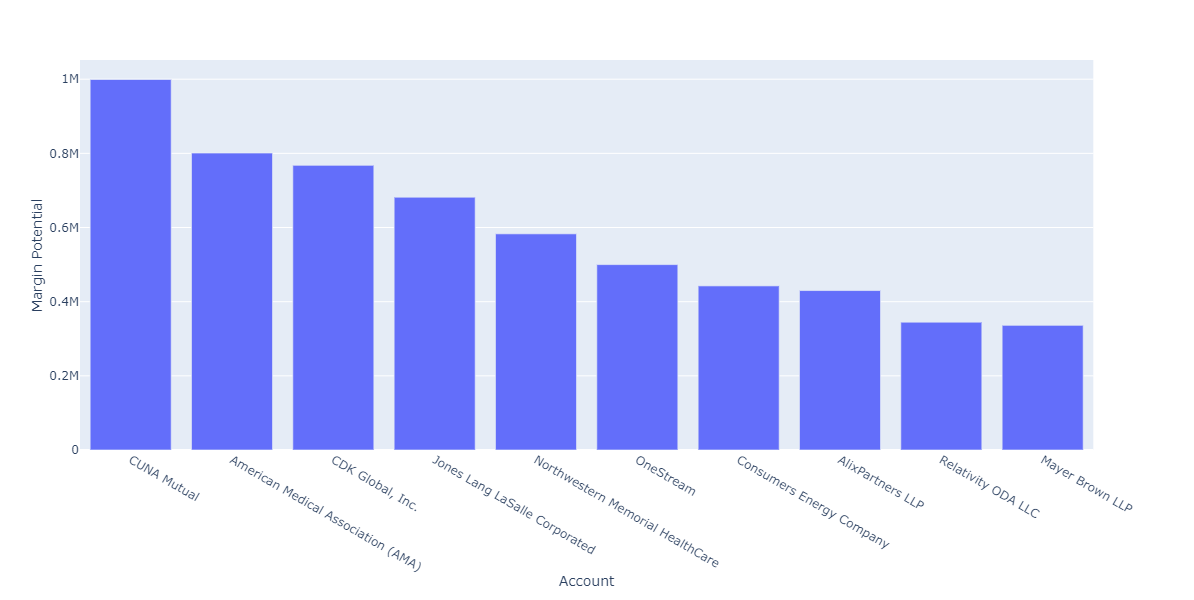

In [12]:
# reps = grouped_rep['sales_rep'].head(10)
# repcomm = grouped_rep['comm_margin'].head(10)
# acct = grouped_acct['account'].head(10)
# acctcomm = grouped_acct['comm_margin'].head(10)

# plt.subplot(221)
# plt.title("Cooper's Deals - Commissionable Margin by Rep (Top10)")
# plt.xticks(rotation=90)
# plt.barh(reps,repcomm)

# plt.subplot(222)
# plt.title("Cooper's Deals - Margin Potential by Account (Top10)")
# plt.xticks(rotation=90)
# plt.barh(acct,acctcomm)

fig = px.bar(grouped_acct.head(10), x='account', y='comm_margin',labels={'account':'Account','comm_margin':'Margin Potential'})
fig.show()